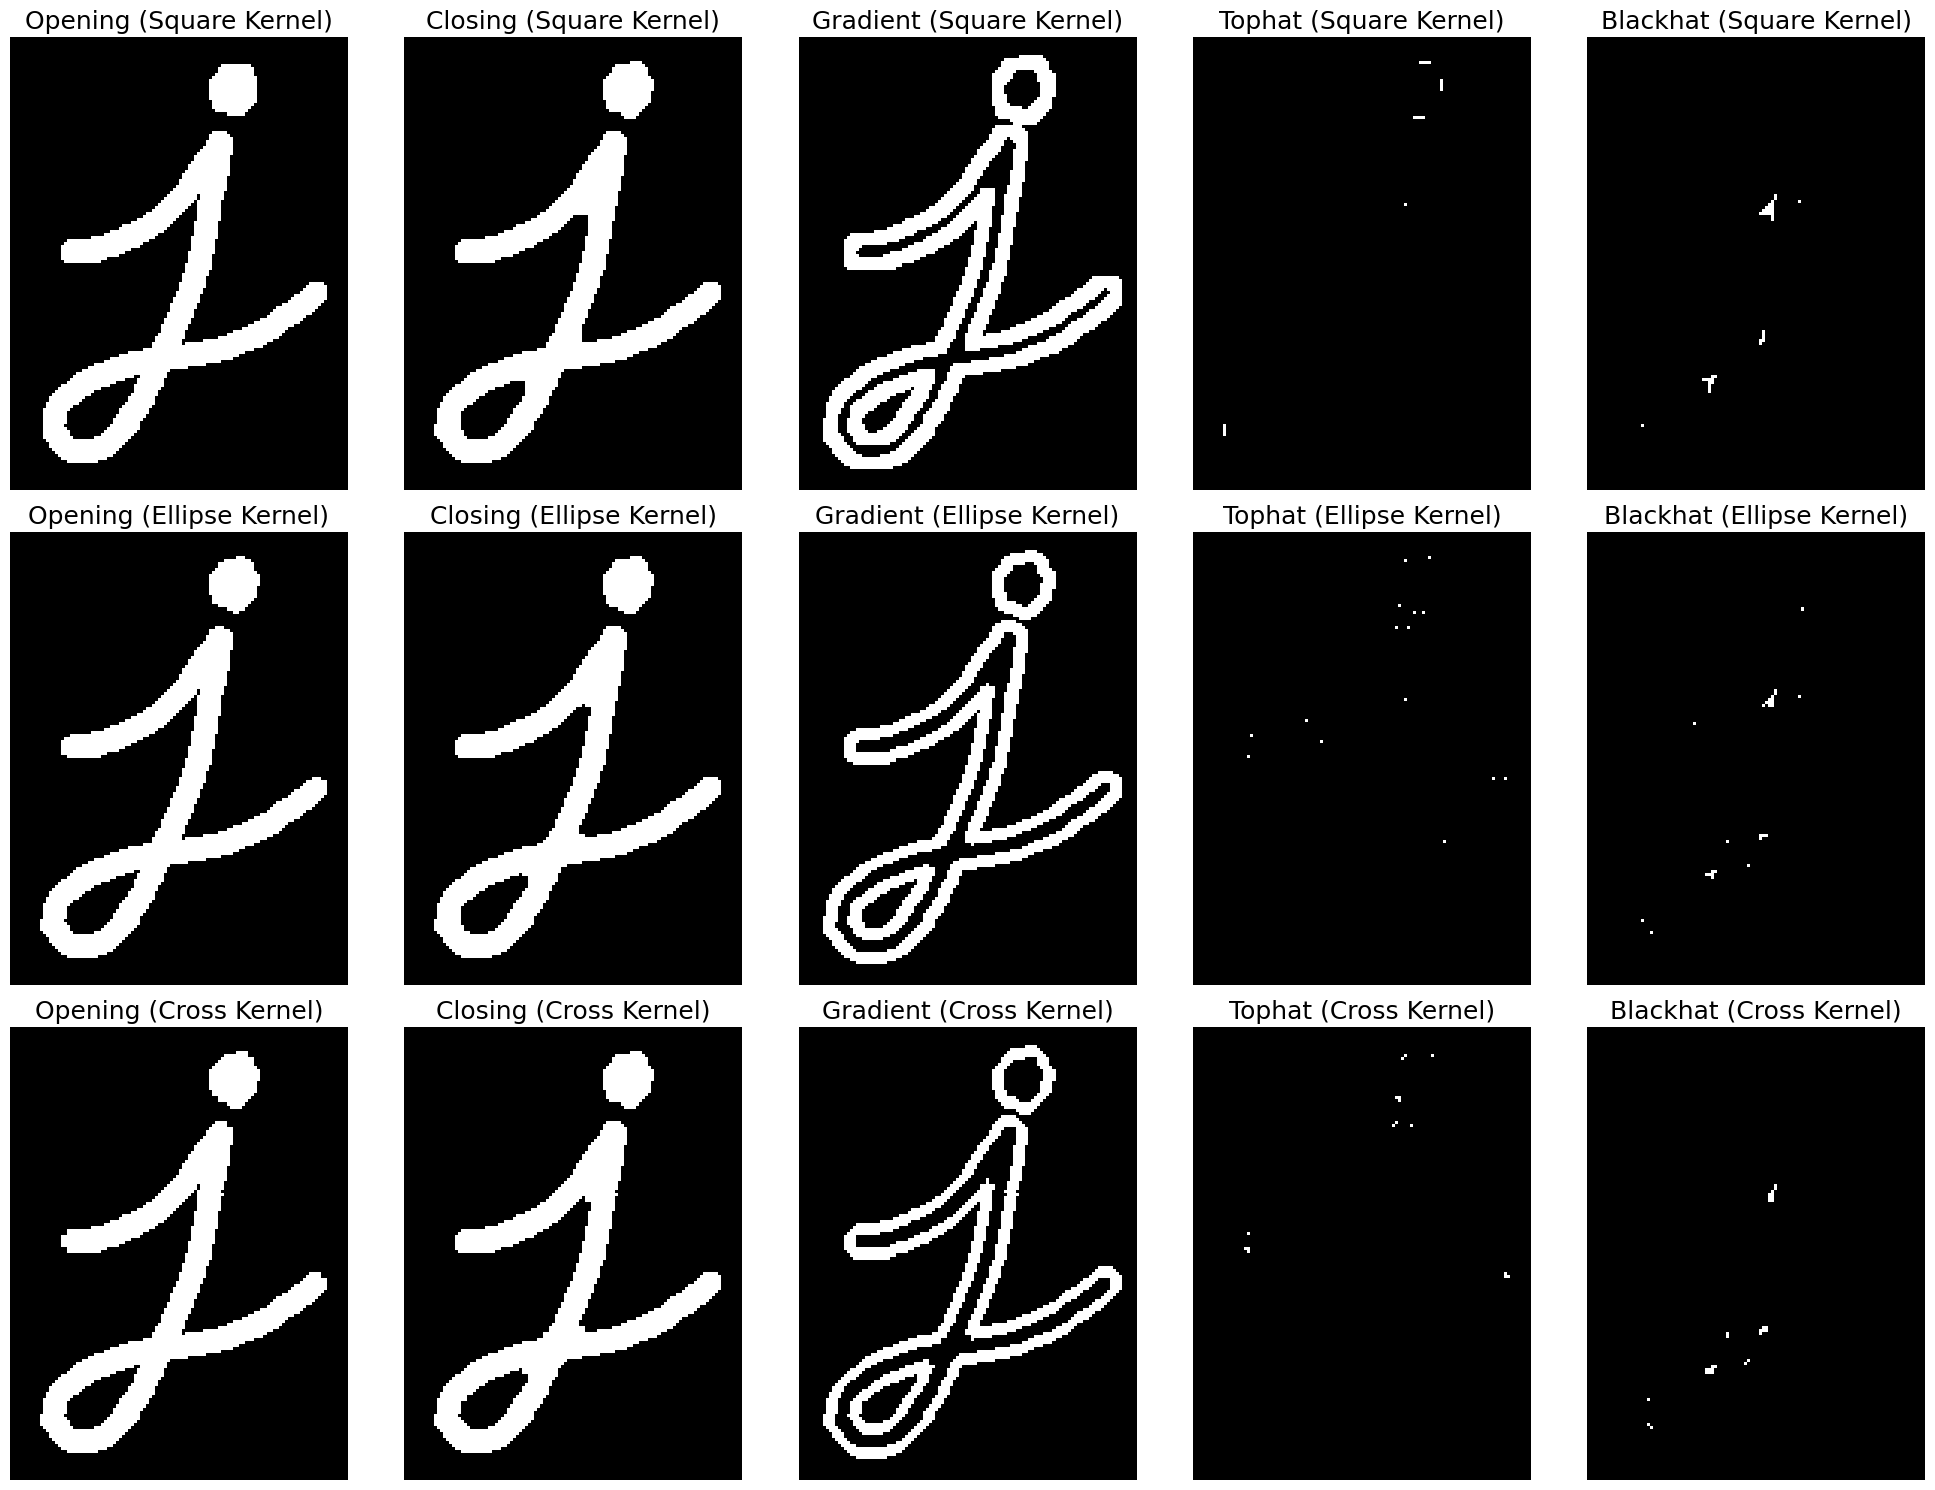

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. 이미지 불러오기
image = cv2.imread('morphology_j.png', cv2.IMREAD_GRAYSCALE)

# 2. 이진화 처리 (이미지가 이미 이진화되어 있지 않을 경우)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# 3. 다양한 커널 정의 (모든 커널은 5x5 크기)
kernels_and_operations = [
    (cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)), "Square Kernel", [
        (cv2.MORPH_OPEN, "Opening"),
        (cv2.MORPH_CLOSE, "Closing"),
        (cv2.MORPH_GRADIENT, "Gradient"),
        (cv2.MORPH_TOPHAT, "Tophat"),
        (cv2.MORPH_BLACKHAT, "Blackhat")
    ]),
    (cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)), "Ellipse Kernel", [
        (cv2.MORPH_OPEN, "Opening"),
        (cv2.MORPH_CLOSE, "Closing"),
        (cv2.MORPH_GRADIENT, "Gradient"),
        (cv2.MORPH_TOPHAT, "Tophat"),
        (cv2.MORPH_BLACKHAT, "Blackhat")
    ]),
    (cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5)), "Cross Kernel", [
        (cv2.MORPH_OPEN, "Opening"),
        (cv2.MORPH_CLOSE, "Closing"),
        (cv2.MORPH_GRADIENT, "Gradient"),
        (cv2.MORPH_TOPHAT, "Tophat"),
        (cv2.MORPH_BLACKHAT, "Blackhat")
    ])
]

# 4. 연산 결과를 저장할 리스트
images_and_titles = []

# 각 커널과 연산자에 대해 계산
for kernel, kernel_name, operations in kernels_and_operations:
    for op_type, op_name in operations:
        result = cv2.morphologyEx(binary_image, op_type, kernel)
        title = f"{op_name} ({kernel_name})"
        images_and_titles.append((result, title))

# 5. 결과 시각화
plt.figure(figsize=(20, 15))
fs = 18

# 이미지 출력
for i, (image, title) in enumerate(images_and_titles):
    plt.subplot(3, 5, i + 1)
    plt.title(title, fontsize=fs)
    plt.imshow(image, cmap='gray', interpolation='nearest')
    plt.axis("off")

plt.tight_layout()
plt.show()
